In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import math
from math import sqrt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

from main.data_tools.Acp_calculator import Acp_and_AcpError_cal, Acp_cal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_fit_tight_v2.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_fit_tight_v2_fitv6.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_fit_tight_v2_fitv8.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_fit_tight_v2_fitv9.root")

# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_fit_tight_v2_fitv5.root")

result_object1 = ROOT.gDirectory.Get("jykim")
f.Close()

fit_args1 = result_object1.floatParsFinal()

In [6]:
# Create an empty dictionary
param_dict = {}

# Iterate over the floating parameters
for i in range(fit_args1.getSize()):
    # Get parameter name
    param_name = fit_args1.at(i).GetName()
    
    # Get parameter value
    param_value = fit_args1.at(i).getVal()
    
    # Get parameter error
    param_error = fit_args1.at(i).getError()
    
    # Add the parameter name, value, and error to the dictionary
    param_dict[param_name] = {'value': param_value, 'error': param_error}

# Print the dictionary
print(param_dict)


{'Ds_mean_gaussian': {'value': -0.0075350932114954805, 'error': 5.055907254933824e-05}, 'Ds_sigma_gaussian': {'value': 0.005283210178465145, 'error': 5.382685374319283e-05}, 'mean_gaussian': {'value': 0.005046862351166359, 'error': 0.00010224622634277855}, 'nDs': {'value': 43246.54618959445, 'error': 344.6230441506723}, 'nbkg1': {'value': 245579.52718866742, 'error': 3603.3884143930622}, 'nbkg2': {'value': 23421.0426673919, 'error': 3247.4374332358207}, 'nsig': {'value': 18564.231547870728, 'error': 325.04673550196685}, 'rhopeta_mean': {'value': 1.6666195844653882, 'error': 0.0642602281775559}, 'rhopeta_sigma': {'value': 0.07833151118716437, 'error': 0.014355001953712495}, 'sigma_gaussian': {'value': 0.005392565021726487, 'error': 0.00011195202794568201}, 'x_bkg1_tau': {'value': -1.4239980680607403, 'error': 0.1475960912533959}}


In [7]:
result_object1.Print("v")


  RooFitResult: minimized FCN value: -4.30622e+06, estimated distance to minimum: 0.00555004
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=-1 HESSE=4 HESSE=4 

    Constant Parameter    Value     
  --------------------  ------------
              Ds_delta    2.9792e-01
              Ds_gamma    2.0698e-01
       Ds_mean_johnson    1.9759e+00
      Ds_sigma_johnson    2.7444e-04
                 delta    2.1858e-01
                 gamma    2.2371e-01
          mean_johnson    1.8647e+00
         sigma_johnson    8.7073e-05

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
      Ds_mean_gaussian    0.0000e+00   -7.5351e-03 +/-  5.06e-05  <none>
     Ds_sigma_gaussian    1.0000e-02    5.2832e-03 +/-  5.38e-05  <none>
         mean_gaussian    0.0000e+00    5.0469e-03 +/-  1.02e-04  <none>
                   nDs    2.6465e+0

In [8]:
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_cc_fit_tight_v2.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_cc_fit_tight_v2_fitv3.root")
f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_cc_fit_tight_v2_fitv6.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_cc_fit_tight_v2_fitv8.root")
# f = ROOT.TFile.Open("/media/jykim/T7/saved_plots/storage_plots/plots/MC15ri/etapip/pipipi/generic/fitresult/MC15ri_1ab_etapip_pipipi_cc_fit_tight_v2_fitv9.root")

result_object1_cc = ROOT.gDirectory.Get("jykim")
f.Close()

fit_args1_cc = result_object1_cc.floatParsFinal()

In [9]:
# Create an empty dictionary
param_dict_cc = {}

# Iterate over the floating parameters
for i in range(fit_args1_cc.getSize()):
    # Get parameter name
    param_name = fit_args1_cc.at(i).GetName()
    
    # Get parameter value
    param_value = fit_args1_cc.at(i).getVal()
    
    # Get parameter error
    param_error = fit_args1_cc.at(i).getError()
    
    # Add the parameter name, value, and error to the dictionary
    param_dict_cc[param_name] = {'value': param_value, 'error': param_error}

# Print the dictionary
print(param_dict_cc)


{'Ds_mean_gaussian': {'value': -0.007513406089777908, 'error': 5.016899958689968e-05}, 'Ds_sigma_gaussian': {'value': 0.005281778062266999, 'error': 5.2195500823675755e-05}, 'mean_gaussian': {'value': 0.004919015907504987, 'error': 9.998308591058188e-05}, 'nDs': {'value': 43001.11826860264, 'error': 321.65227996010907}, 'nbkg1': {'value': 248370.80489137518, 'error': 2546.269279816641}, 'nbkg2': {'value': 24063.143222859428, 'error': 2406.7833671828303}, 'nsig': {'value': 19030.05631149187, 'error': 314.25247903132146}, 'rhopeta_mean': {'value': 1.6565429627028045, 'error': 0.05084750764916732}, 'rhopeta_sigma': {'value': 0.08050121955125991, 'error': 0.016661234718136193}, 'sigma_gaussian': {'value': 0.005524317834086095, 'error': 0.00011151884890973141}, 'x_bkg1_tau': {'value': -1.4532839751116065, 'error': 0.09525711083549668}}


In [10]:
result_object1_cc.Print("v")


  RooFitResult: minimized FCN value: -4.35722e+06, estimated distance to minimum: 0.0246071
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=-1 HESSE=4 HESSE=4 

    Constant Parameter    Value     
  --------------------  ------------
              Ds_delta    2.9792e-01
              Ds_gamma    2.0698e-01
       Ds_mean_johnson    1.9759e+00
      Ds_sigma_johnson    2.7444e-04
                 delta    2.1858e-01
                 gamma    2.2371e-01
          mean_johnson    1.8647e+00
         sigma_johnson    8.7073e-05

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
      Ds_mean_gaussian    0.0000e+00   -7.5134e-03 +/-  5.02e-05  <none>
     Ds_sigma_gaussian    1.0000e-02    5.2818e-03 +/-  5.22e-05  <none>
         mean_gaussian    0.0000e+00    4.9190e-03 +/-  1.00e-04  <none>
                   nDs    2.6757e+05

In [11]:
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/'
base_file_loc =  '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/'


#loc_ccbar = base_file_loc + 'ccbar/tight_v2_240419_Kp_BCS_etapi0const_ccbar_output_02*.root'
loc_ccbar = base_file_loc + 'ccbar/*.root'
# base_filter=' Pip_charge==1'
base_filter='etapip_pipipi_rank==1 && Dp_isSignal==1 && Dp_M>1.76 && Dp_M<2.1'

In [12]:
tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',]

In [13]:
pd_ccbar_0 = get_pd(file=loc_ccbar, tree=tree,base_filter=base_filter,variables=variables)

IOStream.flush timed out


In [14]:
pd_ccbar_0.describe()

# true_Dp = len(pd_ccbar_0)

,__experiment__,__run__,__event__,Dp_M,Dp_isSignal,Dp_CMS_p,Dp_cosAngleBetweenMomentumAndVertexVector,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_acos_cosAngleBetweenMomentumAndVertexVector,Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_pionID,Pip_pionIDNN,Pip_mcPDG,Pip_dr,Pip_p,Pip_charge
count,32889.0,32889.0,3.288900e+04,32889.000000,32889.0,32889.000000,32889.000000,32889.000000,32889.000000,3.288900e+04,32889.000000,32889.000000,32889.000000,3.288900e+04,32889.000000,32889.000000
mean,1003.0,0.0,1.331371e+08,1.868176,1.0,3.404399,0.792972,0.999696,0.497708,1.503425e-02,0.959382,0.940403,1.430661,2.685343e-02,1.629125,0.006780
std,0.0,0.0,7.642166e+07,0.010714,0.0,0.572350,0.337474,0.000731,0.497978,1.957233e-02,0.088889,0.118824,210.998357,3.195213e-02,0.866370,0.999992
min,1003.0,0.0,1.207100e+04,1.760221,1.0,2.500079,-0.980324,0.995006,0.000072,5.251470e-07,0.600142,0.134268,-211.000000,6.755115e-07,0.118758,-1.000000
25%,1003.0,0.0,6.723623e+07,1.864443,1.0,2.925185,0.754750,0.999809,0.126393,2.132703e-03,0.979756,0.951694,-211.000000,6.817622e-03,0.940859,-1.000000
50%,1003.0,0.0,1.328855e+08,1.868954,1.0,3.343140,0.949197,0.999975,0.320122,7.108567e-03,0.999272,0.993922,211.000000,1.640635e-02,1.526628,1.000000
75%,1003.0,0.0,1.984395e+08,1.873119,1.0,3.829469,0.992023,0.999998,0.715523,1.954563e-02,0.999981,0.999879,211.000000,3.470384e-02,2.216561,1.000000
max,1003.0,0.0,2.657819e+08,2.014444,1.0,5.036367,1.000000,1.000000,2.942894,9.998337e-02,1.000000,1.000000,211.000000,5.249867e-01,5.639777,1.000000


In [15]:
Nsig_Dp_MC = len(pd_ccbar_0.query('Pip_charge==1'))

Nsig_Dm_MC = len(pd_ccbar_0.query('Pip_charge==-1'))

In [16]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_pipipi/*.root'
file_name =  '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/topo/resultfile/result_etapip_pipipi/*.root'


base_filter = '(etapip_pipipi_rank==1) && Dp_M>1.76 && Dp_M<2.1'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p','Pip_charge',\
             'iProdBrP_Dsp_0','iProdBrP_Dp_0','iCascDcyBrP_Dp_0','iCascDcyBrCcP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dsp_0']
etapip_signal_topo = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [17]:
Nsig_Dp_MC_topo = len(etapip_signal_topo.query('Pip_charge==1  & iCascDcyBrP_Dp_0==0'))

Nsig_Dm_MC_topo = len(etapip_signal_topo.query('Pip_charge==-1 & iCascDcyBrCcP_Dp_0==0'))

In [18]:
print(Nsig_Dp_MC_topo)

18599


In [19]:
print(Nsig_Dm_MC_topo)

18459


In [20]:
Nsig_err_Dp_MC_topo = math.sqrt(Nsig_Dp_MC_topo)
Nsig_err_Dm_MC_topo = math.sqrt(Nsig_Dm_MC_topo)

In [21]:
Acp_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo)

0.0037778617302606727

In [22]:
Acp_and_AcpError_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo, Nsig_err_Dp_MC_topo,Nsig_err_Dm_MC_topo)

(0.0037778617302606727, 7.791715521524226e-05)

In [23]:
Nsig_Dp_MC_true = len(pd_ccbar_0.query('Pip_charge==1'))
Nsig_Dm_MC_true = len(pd_ccbar_0.query('Pip_charge==-1'))

In [24]:
Nsig_err_Dp_MC_true = math.sqrt(Nsig_Dp_MC_true )
Nsig_err_Dm_MC_true = math.sqrt(Nsig_Dm_MC_true )

In [25]:
Nsig_Dp_MC_true

16556

In [26]:
Nsig_Dm_MC_true

16333

In [27]:
Acp_and_AcpError_cal(Nsig_Dp_MC_true ,Nsig_Dm_MC_true, Nsig_err_Dp_MC_true, Nsig_err_Dm_MC_true )

(0.0067803824987077745, 0.00014755744913750758)

In [28]:
Nsig_Dp_recon = param_dict['nsig']['value']
Nsig_Dm_recon = param_dict_cc['nsig']['value']

Nsig_err_Dp_recon = param_dict['nsig']['error']
Nsig_err_Dm_recon = param_dict_cc['nsig']['error']


In [46]:
Acp_and_AcpError_cal(Nsig_Dp_recon , Nsig_Dm_recon , Nsig_err_Dp_recon, Nsig_err_Dm_recon)

(-0.01239083887860191, 0.01203217414465582)

In [47]:
topo_Acp, topo_AcpErr =  Acp_and_AcpError_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo, Nsig_err_Dp_MC_topo,Nsig_err_Dm_MC_topo)

In [48]:
Acp_and_AcpError_cal(Nsig_Dp_MC_topo,Nsig_Dm_MC_topo, Nsig_err_Dp_MC_topo,Nsig_err_Dm_MC_topo)

(0.0037778617302606727, 0.005194645465500435)

In [49]:
true_Acp, true_AcpErr = Acp_and_AcpError_cal(Nsig_Dp_MC_true ,Nsig_Dm_MC_true, Nsig_err_Dp_MC_true, Nsig_err_Dm_MC_true )

In [50]:
Acp_and_AcpError_cal(Nsig_Dp_MC_true ,Nsig_Dm_MC_true, Nsig_err_Dp_MC_true, Nsig_err_Dm_MC_true )

(0.0067803824987077745, 0.005513973598410242)

In [51]:
recon_Acp, recon_AcpErr = Acp_and_AcpError_cal(Nsig_Dp_recon , Nsig_Dm_recon , Nsig_err_Dp_recon, Nsig_err_Dm_recon)

In [52]:
Acp_and_AcpError_cal(Nsig_Dp_recon , Nsig_Dm_recon , Nsig_err_Dp_recon, Nsig_err_Dm_recon)

(-0.01239083887860191, 0.01203217414465582)

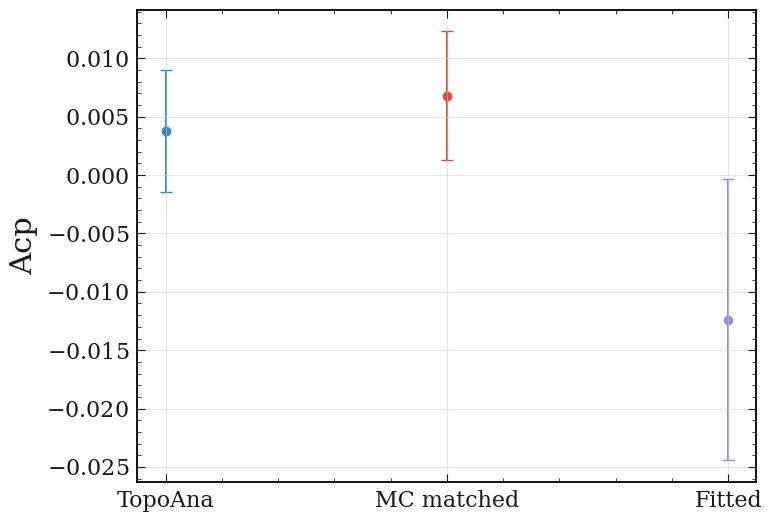

In [63]:
# Plotting
plt.errorbar(1, topo_Acp, yerr=topo_AcpErr, fmt='o',capsize=4, label='TopoAna')
plt.errorbar(2, true_Acp, yerr=true_AcpErr, fmt='o',capsize=4, label='MC matched')
plt.errorbar(3, recon_Acp, yerr=recon_AcpErr, fmt='o',capsize=4, label='Reconstruction')

# Customizing plot
plt.xticks([1, 2, 3], ['TopoAna', 'MC matched', 'Fitted'])
# plt.xlabel('Variables')
plt.ylabel('Acp')
# plt.title('Plot with Error Bars')
# plt.legend()

plt.grid(True, alpha=0.5) # Display plot
# plt.ylim(0,)

plt.tight_layout()
plt.savefig("/share/storage/jykim/plots/MC15ri/etapip/pipipi/Acp/MC15ri_1ab_etapip_pipipi_compare_tight_v2_fitv6_Acp.png")

plt.show()

NameError: name 'Nsig_Dp_MC_topo' is not defined

In [199]:
# print('MC Acp=',(Nsig_Dp_MC - Nsig_Dm_MC ) / (Nsig_Dp_MC + Nsig_Dm_MC ) )

In [212]:
print('MC Acp=',(Nsig_Dp_MC_topo - Nsig_Dm_MC_topo ) / (Nsig_Dp_MC_topo + Nsig_Dm_MC_topo ) )

MC Acp= 0.0037778617302606727


In [213]:
Nsig_Dp = param_dict['nsig']['value']
param_dict['nsig']['value']


18564.231547870728

In [214]:
param_dict['nsig']['error']


325.04673550196685

In [215]:
Nsig_Dm = param_dict_cc['nsig']['value']
param_dict_cc['nsig']['value']

19030.05631149187

In [216]:
param_dict_cc['nsig']['error']

314.25247903132146

In [217]:
print('Measurment of Acp=',(Nsig_Dp - Nsig_Dm ) / (Nsig_Dp + Nsig_Dm ) )

Measurment of Acp= -0.01239083887860191


In [218]:
Pull_Dp = (param_dict['nsig']['value']-Nsig_Dp_MC_topo)/param_dict['nsig']['error']

In [219]:
Pull_Dm = (param_dict_cc['nsig']['value']-Nsig_Dm_MC_topo)/param_dict_cc['nsig']['error']

In [220]:
Pull_Dp

-0.10696447104930795

In [221]:
Pull_Dm

1.8171895198794996

In [169]:
pd_ccbar_0.Pip_charge

NameError: name 'pd_ccbar_0' is not defined

In [317]:
(17377.4672580645 - 16625)/16625



0.045261188455007414